In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pvlib import temperature

# Faiman rad

### Importing dataframe

In [67]:
#readcsv
df = pd.read_csv("df_hourly")

if not isinstance(df["Timestamp"], pd.DatetimeIndex):
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace=True)

In [68]:
#readcsv
df_era5 = pd.read_csv("strd_era5_IFE.csv")  #Data from era5 for downwelling 

if not isinstance(df_era5["valid_time"], pd.DatetimeIndex):
        df_era5["valid_time"] = pd.to_datetime(df_era5["valid_time"])
df_era5.set_index("valid_time", inplace=True)

df_era5 = df_era5.tz_localize('UTC', ambiguous=False, nonexistent='NaT')
df_era5.index = df_era5.index - pd.Timedelta(hours=1)

df = df.join(df_era5, how='inner')

In [69]:
df_era5

,strd
valid_time,
2020-12-31 23:00:00+00:00,301.52335
2021-01-01 00:00:00+00:00,302.26193
2021-01-01 01:00:00+00:00,303.11722
2021-01-01 02:00:00+00:00,302.71335
2021-01-01 03:00:00+00:00,305.91138
...,...
2024-10-23 03:00:00+00:00,248.61734
2024-10-23 04:00:00+00:00,252.70175
2024-10-23 05:00:00+00:00,251.69788


In [70]:
df

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s],strd
2021-03-03 16:00:00+00:00,8.590833,8.785833,6.380000,8.590833,8.785833,6.380000,7.557500,7.977500,7.859167,8.286667,...,NaN,NaN,1002.936667,1002.436667,4.460000,82.579167,1.596667,191.633333,1.775833,237.91565
2021-03-03 17:00:00+00:00,1.888333,1.929167,-0.885000,1.888333,1.929167,-0.885000,0.744167,1.030833,1.052500,1.528333,...,NaN,NaN,1002.223333,1001.723333,4.365000,86.360833,0.546667,191.410833,1.795833,236.86899
2021-03-03 18:00:00+00:00,-1.303333,-1.360000,-3.855833,-1.303333,-1.360000,-3.855833,-2.788333,-2.546667,-2.190833,-1.960000,...,NaN,NaN,1002.106667,1001.606667,4.196667,91.858333,-0.874167,184.155833,1.600000,235.57494
2021-03-03 19:00:00+00:00,-1.688333,-1.693333,-4.295000,-1.688333,-1.693333,-4.295000,-3.192500,-2.951667,-2.508333,-2.453333,...,NaN,NaN,1002.175833,1001.675833,4.110000,93.687500,-1.392500,175.453333,1.420000,236.75310
2021-03-03 20:00:00+00:00,-0.342500,-0.297500,-2.721667,-0.342500,-0.297500,-2.721667,-1.824167,-1.557500,-1.310833,-1.088333,...,NaN,NaN,1002.415833,1001.915833,4.163333,95.575000,-1.446667,147.527500,0.799167,246.43866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 19:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500,309.43723
2024-08-12 20:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667,311.90860
2024-08-12 21:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,-2.996667,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500,302.76187
2024-08-12 22:00:00+00:00,11.294167,11.232500,8.863333,8.721667,8.578333,8.610833,10.146667,10.370000,10.425833,11.990833,...,-4.360000,NaN,1001.030833,1000.530833,8.281667,60.834167,16.041667,214.940000,0.750000,305.90918


In [71]:
df

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s],strd
2021-03-03 16:00:00+00:00,8.590833,8.785833,6.380000,8.590833,8.785833,6.380000,7.557500,7.977500,7.859167,8.286667,...,NaN,NaN,1002.936667,1002.436667,4.460000,82.579167,1.596667,191.633333,1.775833,237.91565
2021-03-03 17:00:00+00:00,1.888333,1.929167,-0.885000,1.888333,1.929167,-0.885000,0.744167,1.030833,1.052500,1.528333,...,NaN,NaN,1002.223333,1001.723333,4.365000,86.360833,0.546667,191.410833,1.795833,236.86899
2021-03-03 18:00:00+00:00,-1.303333,-1.360000,-3.855833,-1.303333,-1.360000,-3.855833,-2.788333,-2.546667,-2.190833,-1.960000,...,NaN,NaN,1002.106667,1001.606667,4.196667,91.858333,-0.874167,184.155833,1.600000,235.57494
2021-03-03 19:00:00+00:00,-1.688333,-1.693333,-4.295000,-1.688333,-1.693333,-4.295000,-3.192500,-2.951667,-2.508333,-2.453333,...,NaN,NaN,1002.175833,1001.675833,4.110000,93.687500,-1.392500,175.453333,1.420000,236.75310
2021-03-03 20:00:00+00:00,-0.342500,-0.297500,-2.721667,-0.342500,-0.297500,-2.721667,-1.824167,-1.557500,-1.310833,-1.088333,...,NaN,NaN,1002.415833,1001.915833,4.163333,95.575000,-1.446667,147.527500,0.799167,246.43866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 19:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500,309.43723
2024-08-12 20:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667,311.90860
2024-08-12 21:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,-2.996667,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500,302.76187
2024-08-12 22:00:00+00:00,11.294167,11.232500,8.863333,8.721667,8.578333,8.610833,10.146667,10.370000,10.425833,11.990833,...,-4.360000,NaN,1001.030833,1000.530833,8.281667,60.834167,16.041667,214.940000,0.750000,305.90918


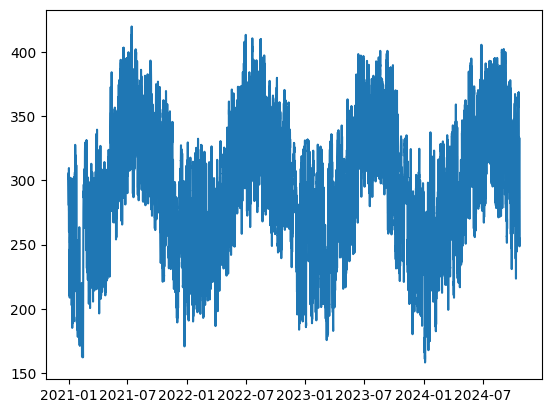

In [72]:
plt.plot(df_era5.index, df_era5["strd"])

In [73]:
df.columns

Index(['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'Irradiance (SMP10 Sunpower plan) [W/m²]',
       'Irradiance (SMP10 Sunpower horisontal) [W/m²]',
       'Irradiance (SMP10 Talesun albedo) [W/m²]',
       'Irradiance (SMP10 Talesun plan) [W/m²]',
       'Irradiance (KippZonen SMP10 20201023) [W/m²]',
       'WS500_1_Air pressure abs [hPa]', 'WS500_1_Air

In [74]:
df["era5"] = df_era5["strd"]

### Plotting function for comparison

In [75]:
import matplotlib.dates as mdates

def plot_comparison(x, temp_model, temp_measured, module_name):
    if not isinstance(x, pd.DatetimeIndex):
        x = pd.to_datetime(x)

    #x = x.asfreq('h')

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 6), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
    ax1.set_title(f"Model prediction and measured temperature for {module_name}")
    ax1.plot(x, temp_model, label="Faiman module temperature")
    ax1.plot(x, temp_measured, label="Measured module temperature")
    ax1.set_ylabel("[°C]")
    #ax2.set_title("Residuals")
    ax2.plot(x, temp_model-temp_measured)
    ax2.set_ylabel("Residuals [°C]")
    ax2.axhline(0, c="grey", linestyle=":")
    ax1.legend()
    ax2.xaxis.set_major_locator(mdates.AutoDateLocator())  
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha="right") 
    plt.tight_layout()
    plt.show()

### Faiman rad

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21797 entries, 2021-03-03 16:00:00+00:00 to 2024-08-12 23:00:00+00:00
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   PT JKM325 nr 1 [°C]                            21797 non-null  float64
 1   PT JKM325 nr 2 [°C]                            21797 non-null  float64
 2   PT JKM325 nr 3 [°C]                            21797 non-null  float64
 3   PT JKM335 nr 1 [°C]                            21797 non-null  float64
 4   PT JKM335 nr 2 [°C]                            21797 non-null  float64
 5   PT JKM335 nr 3 [°C]                            21797 non-null  float64
 6   PT REC nr 1 [°C]                               21797 non-null  float64
 7   PT REC nr 2 [°C]                               21797 non-null  float64
 8   PT REC nr 3 [°C]                               21797 non-null  float64
 9   PT 

All arguments may be scalars or vectors. If multiple arguments are vectors they must be the same length.

When only irradiance, air temperature and wind speed inputs are provided (ir_down is None) this function calculates the same device temperature as the original faiman model. When down-welling long-wave radiation data are provided as well (ir_down is not None) the default u0 and u1 values from the original model should not be used because a portion of the radiative losses would be double-counted.

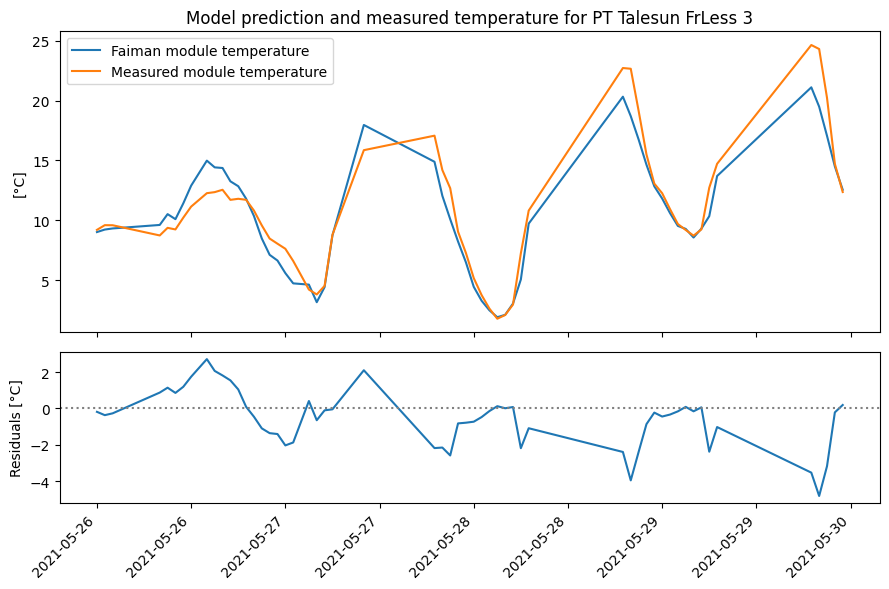

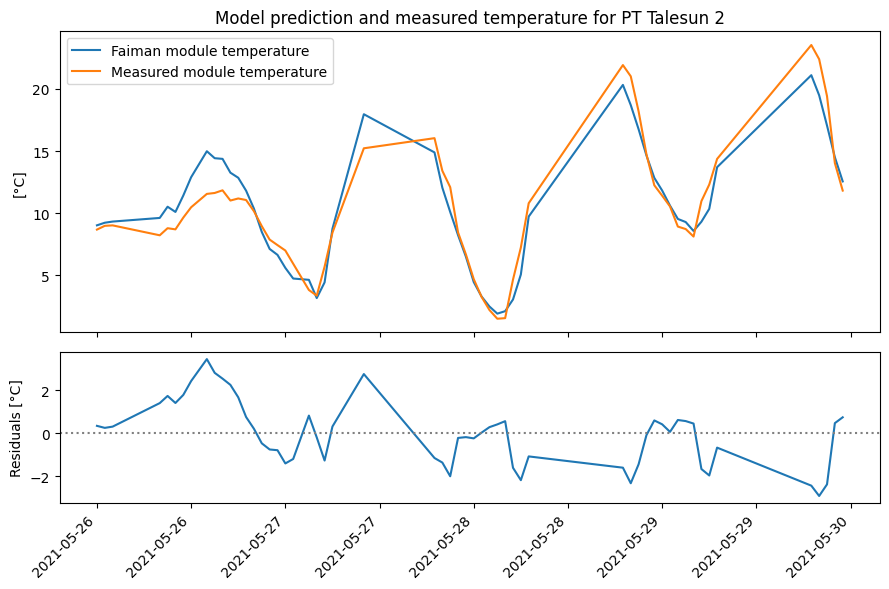

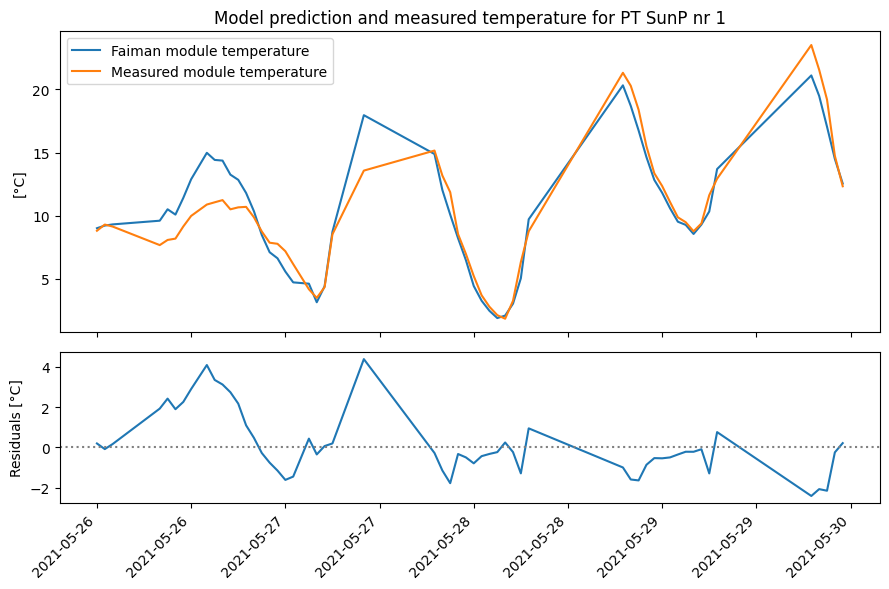

In [108]:
datea = '2021-05-26'
dateb = '2021-05-29'

#Bifacial panel
temp_faiman1 = temperature.faiman_rad(df["Irradiance (IRR Plan - Talesun) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91)
plot_comparison(df.loc[datea:dateb].index, temp_faiman1.loc[datea:dateb], df["PT Talesun FrLess 3 [°C]"].loc[datea:dateb], "PT Talesun FrLess 3")
temp_faiman2 = temperature.faiman_rad(df["Irradiance (IRR Plan - Talesun) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91)
plot_comparison(df.loc[datea:dateb].index, temp_faiman2.loc[datea:dateb], df["PT Talesun 2 [°C]"].loc[datea:dateb], "PT Talesun 2")
#Normal panel
temp_faiman3 = temperature.faiman_rad(df["Irradiance (IRR Plan - SunP) [W/m²]"], df['PT SunP nr 1 [°C]'], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91)
plot_comparison(df.loc[datea:dateb].index, temp_faiman2.loc[datea:dateb], df['PT SunP nr 1 [°C]'].loc[datea:dateb], "PT SunP nr 1")

### Mean Bias Error

In [78]:
def MBE(model_results, measured_temp): 
    df_temp = pd.DataFrame({'model_results': model_results, 'measured_temp': measured_temp})
    df_temp = df_temp.dropna(how="any")

    #Calculating RMSE
    mbe = (1/len(df_temp["model_results"])) * np.sum(df_temp["model_results"] - df_temp["measured_temp"]) #np.sqrt(((df_temp["model_results"] - df_temp["measured_temp"])**2).mean())
    return mbe

In [79]:
#Bifacial
print(MBE(temp_faiman1, df["PT Talesun FrLess 3 [°C]"]))
print(MBE(temp_faiman2, df["PT Talesun 2 [°C]"]))
#Monofacial
print(MBE(temp_faiman3, df['PT SunP nr 1 [°C]']))

0.024814655160607435
0.7549145698694706
-0.2502461873009201


### Root Mean Squared Error

In [80]:
#RMSE
def rmse(model_results, measured_temp):
    df_temp = pd.DataFrame({'model_results': model_results, 'measured_temp': measured_temp})
    df_temp = df_temp.dropna(how="any")

    #Calculating RMSE
    rmse = np.sqrt(((df_temp["model_results"] - df_temp["measured_temp"])**2).mean())
    return rmse

In [81]:

#Bifacial
print(rmse(temp_faiman1, df["PT Talesun FrLess 3 [°C]"]))
print(rmse(temp_faiman2, df["PT Talesun 2 [°C]"]))
#Monofacial
print(rmse(temp_faiman2, df['PT SunP nr 1 [°C]']))

1.244244321704725
1.408018436337098
1.3123308197169652


### Calculating and saving values for comparison

In [102]:
temp_faiman1 = temperature.faiman_rad(df['Irradiance (IRR Plan - JKM325) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91)
temp_faiman2 = temperature.faiman_rad(df['Irradiance (IRR Plan - JKM335) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91)
temp_faiman3 = temperature.faiman_rad(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91)
temp_faiman4 = temperature.faiman_rad(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91)
temp_faiman5 = temperature.faiman_rad(df['Irradiance (IRR Plan - Talesun) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91)
temp_faiman6 = temperature.faiman_rad(df['Irradiance (IRR Plan - Talesun) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91)

In [103]:
module_names = ["PT JKM325 nr 3", "PT JKM335 nr 3", "PT SunP nr 2", "PT REC nr 3", "PT Talesun FrLess 1",  "PT Talesun 3"]

MBE1 = MBE(temp_faiman1, df["PT JKM325 nr 3 [°C]"])
MBE2 = MBE(temp_faiman2, df["PT JKM335 nr 3 [°C]"])
MBE3 = MBE(temp_faiman3, df['PT SunP nr 2 [°C]'])
MBE4 = MBE(temp_faiman4, df['PT REC nr 3 [°C]'])
MBE5 = MBE(temp_faiman5, df["PT Talesun FrLess 1 [°C]"])
MBE6 = MBE(temp_faiman6, df["PT Talesun 3 [°C]"])

In [104]:
RMSE1 = rmse(temp_faiman1, df["PT JKM325 nr 3 [°C]"])
RMSE2 = rmse(temp_faiman2, df["PT JKM335 nr 3 [°C]"])
RMSE3 = rmse(temp_faiman3, df['PT SunP nr 2 [°C]'])
RMSE4 = rmse(temp_faiman4, df['PT REC nr 3 [°C]'])
RMSE5 = rmse(temp_faiman5, df["PT Talesun FrLess 1 [°C]"])
RMSE6 = rmse(temp_faiman6, df["PT Talesun 3 [°C]"])

In [105]:
results = pd.DataFrame({
    "Module": module_names,
    "RMSE": [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6],
    "MBE": [MBE1, MBE2, MBE3, MBE4, RMSE5, RMSE6]
})

In [106]:
results.to_csv('Faiman_rad_results.csv', index=False)

In [107]:
results

,Module,RMSE,MBE
0,PT JKM325 nr 3,3.218072,3.013215
1,PT JKM335 nr 3,3.442855,3.253686
2,PT SunP nr 2,1.288253,0.669224
3,PT REC nr 3,1.904962,1.542662
4,PT Talesun FrLess 1,1.343003,1.343003
5,PT Talesun 3,1.395338,1.395338
